In [48]:
import pickle
import matplotlib.pyplot as plt
import numpy as np
import os
import random

In [120]:
with open('../nonzero_traces.npy', 'rb') as f:
    traces = pickle.load(f)
    
with open('../results/shapelets/num=0size=0.6', 'rb') as f:
    shapelets = pickle.load(f)
    
filename = '../results/data/X/' + 'num=' + '0' + 'size=' + '0.25' + 'samples=' + '400000'  
with open(filename, 'rb') as f:
    X = pickle.load(f)

# with open('../results/data/y/num=5size=400samples=400000', 'rb') as f:
#      y = pickle.load(f)

In [9]:
print(len(traces[23][800]))

2481


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


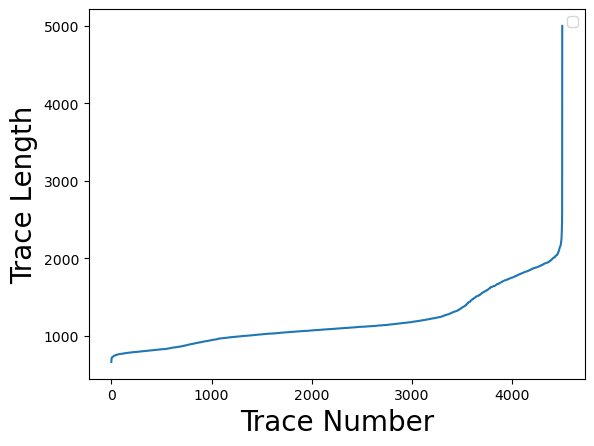

In [45]:
trace_lens = [len(X) for X in traces[57]]
trace_lens.sort()

plt.plot(trace_lens)
plt.xlabel("Trace Number", fontsize="20")
plt.ylabel("Trace Length", fontsize="20")
plt.legend()
plt.show()

In [23]:
print(len(traces))
print(len(traces[25]))
print(len(traces[25][15]))

100
4500
823


In [24]:
print(len(shapelets))
print(len(shapelets[0]))

100
500


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


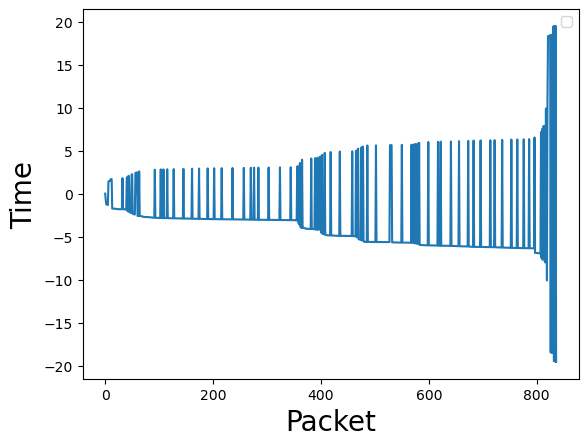

In [27]:
trace = traces[87][2000]
plt.plot(trace)
plt.xlabel("Packet", fontsize="20")
plt.ylabel("Time", fontsize="20")
plt.legend()
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


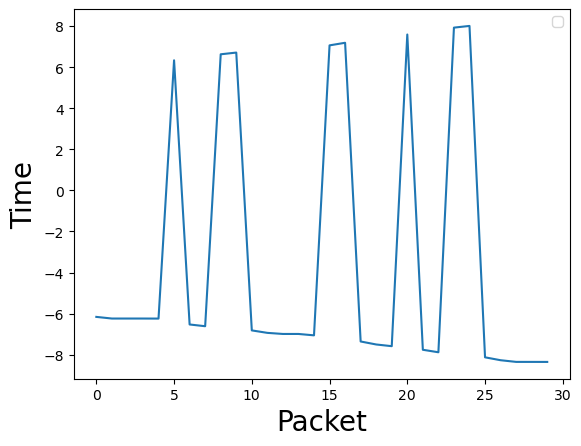

In [130]:
shapelet = shapelets[88]
plt.plot(shapelet)
plt.xlabel("Packet", fontsize="20")
plt.ylabel("Time", fontsize="20")
plt.legend()
plt.show()

In [31]:
print(len(X))
print(len(X[0]))
print(len(y))
print(y[0])

345520
100
345520
7


In [46]:
class_id = 22
for i in range(len(y)):
    if y[i] == class_id:
        x = X[i] 
        break

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


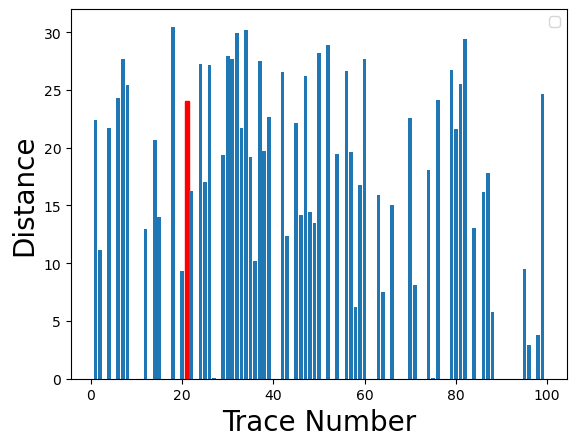

In [123]:
bar = plt.bar(range(0,len(X[101])), X[101])
bar[class_id].set_color('r')
#ax = plt.gca()
#ax.set_ylim([23, 27])
plt.xlabel("Trace Number", fontsize="20")
plt.ylabel("Distance", fontsize="20")
plt.legend()
plt.show()

In [ ]:
size_4, size_5, size_6 = [0]*4, [0]*4, [0]*4
top = 1
directory = "../results/scores/"

for filename in os.listdir(directory):
    with open("../results/scores/" + filename, 'rb') as f:
        if(filename==".DS_Store"):
            continue
        score = pickle.load(f)
        index = int((int(filename[10:13]) / 100) - 3)
        if (filename[4] == '4'):
            size_4[index] = score[top]
        elif (filename[4] == '5'):
            size_5[index] = score[top]
        else:
            size_6[index] = score[top]
            
lengths = [300, 400, 500, 600]
plt.plot(lengths, size_4, label="4 shapelets", linestyle='--', marker='o')
plt.plot(lengths, size_5, label="5 shapelets", linestyle='--', marker='o')
plt.plot(lengths, size_6, label="6 shapelets", linestyle='--', marker='o')
plt.xlabel("Size of Shapelet", fontsize="20")
plt.ylabel("Top-1 Accuracy Score", fontsize="20")
plt.legend()
plt.show()

In [91]:
class_scores = {}
directory = "../results/scores_perclass/"


for filename in os.listdir(directory):
    with open(directory + filename, 'rb') as f:
        if(filename==".DS_Store"):
            continue
        scores = pickle.load(f)
        class_scores[filename[4]] = scores

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


[12, 51, 26, 94, 12, 29, 0, 22, 3, 21]


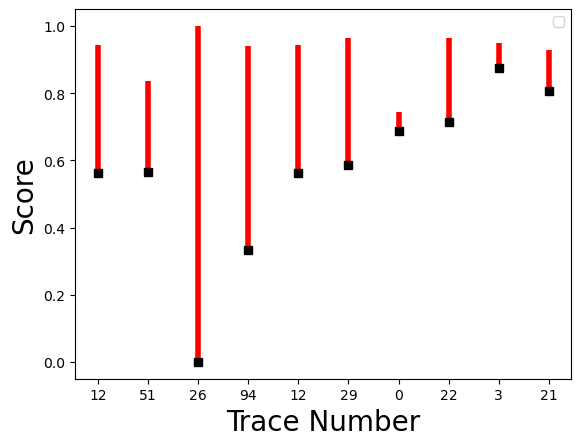

In [110]:
X = [random.randint(0,96) for i in range(10)]
y = []
y_err = [[0] * 10,[]]
print(X)

for class_id in X:
    min_score = 1
    max_score = 0
    
    for scores in class_scores.values():
        if scores[class_id] < min_score:
            min_score = scores[class_id]   
        if scores[class_id] > max_score:
            max_score = scores[class_id]
    
    y.append(min_score)
    y_err[1].append(max_score-min_score)
    
plt.errorbar(range(10), y, yerr=y_err, ecolor='r',elinewidth=4,fmt='s',color='k')
plt.xticks(range(10), X)
plt.xlabel("Trace Number", fontsize="20")
plt.ylabel("Score", fontsize="20")
plt.legend()
plt.show()

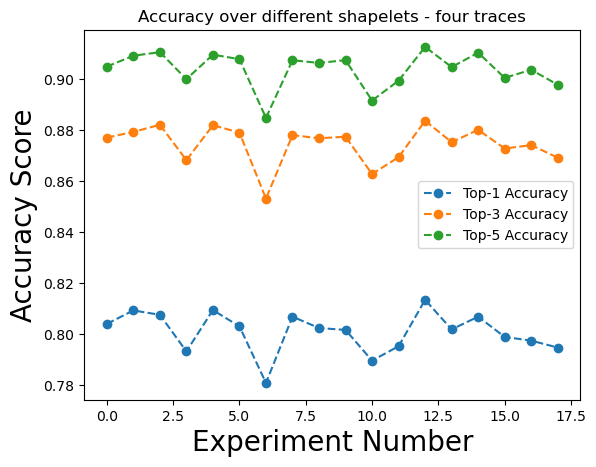

In [103]:
directory = "../results/scores/"
#directory = "/Users/michaelwrana/Desktop/results_1"

top1, top3, top5 = [], [], []

for filename in os.listdir(directory):
    with open(directory + filename, 'rb') as f:
        if(filename==".DS_Store"):
            continue
        score = pickle.load(f)
        top1.append(score[0])
        top3.append(score[1])
        top5.append(score[2])
    
plt.plot(range(18), top1, label="Top-1 Accuracy", linestyle='--', marker='o')
plt.plot(range(18), top3, label="Top-3 Accuracy", linestyle='--', marker='o')
plt.plot(range(18), top5, label="Top-5 Accuracy", linestyle='--', marker='o')
plt.xlabel("Experiment Number", fontsize="20")
plt.ylabel("Accuracy Score", fontsize="20")
plt.title("Accuracy over different shapelets - four traces")
plt.legend()
plt.show()

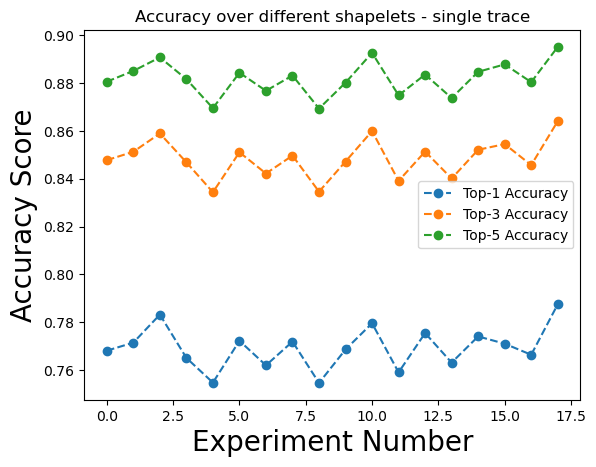